<a href="https://colab.research.google.com/github/SanaaMohammed/Machine-Learning-Project/blob/main/Drug_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Importing Libraries 📚
👉 **Importing libraries** that will be used in this notebook.

# 1. Introduction 👋
<center><img src="https://images.unsplash.com/photo-1607619056574-7b8d3ee536b2?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1240&q=80" alt="Drug Picture" width="700" height="700"></center><br>

## Data Set Problems 🤔
👉 This dataset contains information about drug classification based on patient general information and its diagnosis. Machine learning model is needed in order **to predict the outcome of the drugs type** that might be suitable for the patient.

---

## Objectives of Notebook 📌
👉 **This notebook aims to:**
*   Dataset exploration using various types of data visualization.
*   Build various ML models that can predict drug type.

👨‍💻 **The machine learning models used in this project are:**
1. Linear Logistic Regression
2. Linear Support Vector Machine (SVM)
3. K Neighbours
4. Naive Bayes (Categorical & Gaussian)
5. Decision Tree
6. Random Forest

---

## Data Set Description 🧾

👉 There are **6 variables** in this data set:
*   **4 categorical** variables,and
*   **2 continuous** variables.

<br>

👉 The following is the **structure of the data set**.


<table style="width:100%">
<thead>
<tr>
<th style="text-align:center; font-weight: bold; font-size:14px">Variable Name</th>
<th style="text-align:center; font-weight: bold; font-size:14px">Description</th>
<th style="text-align:center; font-weight: bold; font-size:14px">Sample Data</th>
</tr>
</thead>
<tbody>
<tr>
<td><b>Age</b></td>
<td>Patient Age</td>
<td>23; 47; ...</td>
</tr>
<tr>
<td><b>Sex</b></td>
<td>Gender of patient <br> (male or female)</td>
<td>F; M; ...</td>
</tr>
<tr>
<td><b>BP</b></td>
<td>Levels of blood pressure <br> (high, normal, or low)</td>
<td>HIGH; NORMAL; LOW; ...</td>
</tr>
<tr>
<td><b>Cholesterol</b></td>
<td>Levels of cholesterol <br> (high or normal)</td>
<td>1.4; 1.3; ...</td>
</tr>
<tr>
<td><b>Na_to_K</b></td>
<td>Sodium to potassium ratio in blood</td>
<td>25.355; 13.093; ...</td>
</tr>
<tr>
<td><b>Drug</b></td>
<td>Type of drug</td>
<td>DrugY; drugC; ...</td>
</tr>
</tbody>
</table>

---


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


# 3. Reading Data Set 👓
👉 After importing libraries, we will also **import the dataset** that will be used.

In [4]:
df_drug = pd.read_csv("/content/drug200.csv")

👉 Read the first 6 rows in the dataset.

In [ ]:
df_drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


👉 Data type and checking null in dataset.

In [5]:
print(df_drug.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


👉 From the results above, **there are no missing/null value** in this dataset

# 4. Initial Dataset Exploration 🔍
👉 This section will explore raw dataset that has been imported.

## 4.1 Categorical Variables 📊

In [6]:
df_drug.Drug.value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [7]:
df_drug.Sex.value_counts()

Sex
M    104
F     96
Name: count, dtype: int64

👉 The distribution of patient gender is balanced.

In [8]:
df_drug.BP.value_counts()

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

👉 The distribution of blood pressure level is balanced.

In [9]:
df_drug.Cholesterol.value_counts()

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

👉 The distribution of cholesterol level is balanced.

## 4.2 Numerical Variables 🔢
👉 This section will show mean, count, std, min, max and others using describe function. The skewness value for each numerical variables will also shown in this section.

In [10]:
df_drug.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


👉Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. In simpler terms, it tells you whether the data is concentrated more on one side of the mean than the other.

- If skewAge is negative, it indicates that the distribution is skewed to the left (long tail on the left side).
- If skewAge is positive, it indicates that the distribution is skewed to the right (long tail on the right side).
- If skewAge is close to zero, it indicates that the distribution is approximately symmetric.

In [11]:
skewAge = df_drug.Age.skew(axis = 0, skipna = True)
print('Age skewness: ', skewAge)

Age skewness:  0.03030835703000607


In [12]:
skewNatoK = df_drug.Na_to_K.skew(axis = 0, skipna = True)
print('Na to K skewness: ', skewNatoK)

Na to K skewness:  1.039341186028881


<ipython-input-13-b63208141c63>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_drug['Age']);


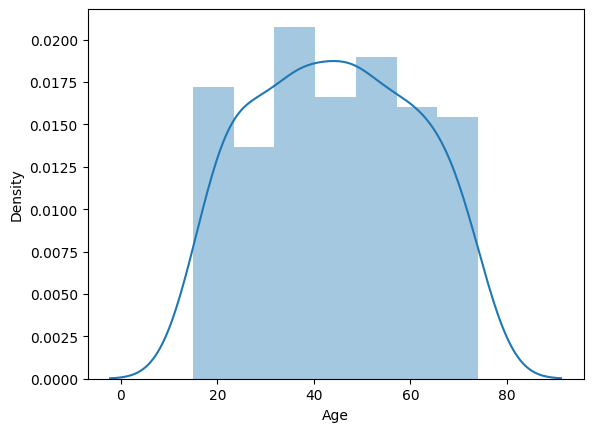

In [13]:
sns.distplot(df_drug['Age']);

<ipython-input-14-cbf3664b68d6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_drug['Na_to_K']);


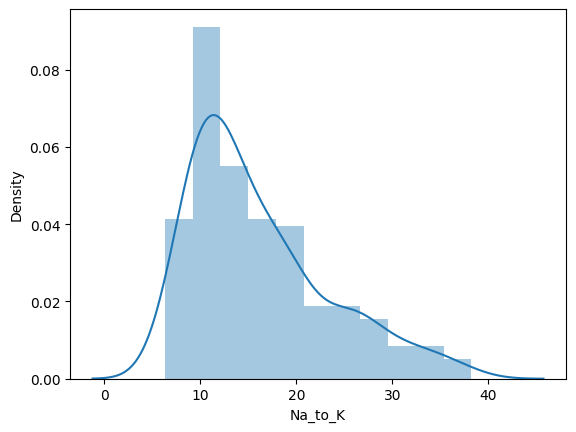

In [14]:
sns.distplot(df_drug['Na_to_K']);

👉The distribution of **'Age'** column is **symetric**, since the skewness value  between -0.5 and 0.5 <br>
👉The distribution of **'Na_to_K'** column is **moderately skewed**, since the skewness value is ***between 0.5 and 1***. It can also be seen from the histogram for 'Na_to_K' column

# 5. EDA 📊
👉 This section will explore variables in the dataset using different various plots/charts.

## 5.1 Drug Type Distribution 💊

<ipython-input-15-bcf253f0154b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Drug", data=df_drug, palette="flare")


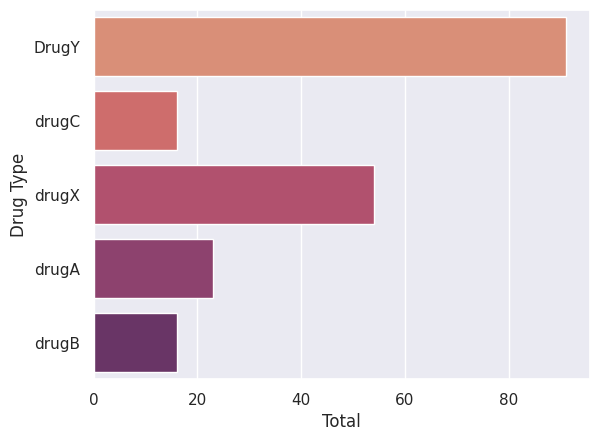

In [15]:
sns.set_theme(style="darkgrid")
sns.countplot(y="Drug", data=df_drug, palette="flare")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

## 5.2 Gender Distribution 👫

<ipython-input-16-bcf51446a01a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sex", data=df_drug, palette="rocket")


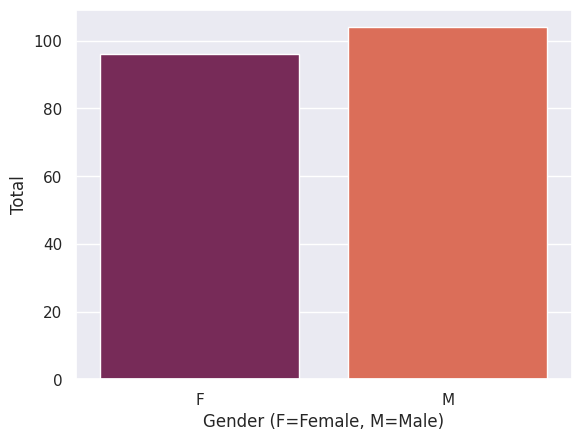

In [16]:
sns.set_theme(style="darkgrid")
sns.countplot(x="Sex", data=df_drug, palette="rocket")
plt.xlabel('Gender (F=Female, M=Male)')
plt.ylabel('Total')
plt.show()

## 5.3 Blood Pressure Distribution 🩸

<ipython-input-17-3e4dbb4a4643>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="BP", data=df_drug, palette="crest")


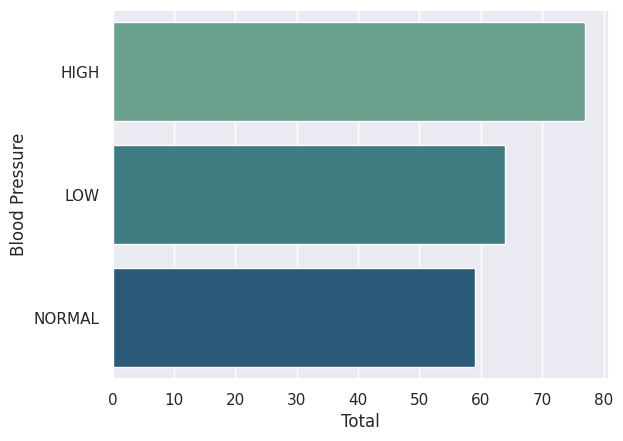

In [17]:
sns.set_theme(style="darkgrid")
sns.countplot(y="BP", data=df_drug, palette="crest")
plt.ylabel('Blood Pressure')
plt.xlabel('Total')
plt.show()

## 5.4 Cholesterol Distribution 🥛

<ipython-input-18-7d001ee0b7c7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Cholesterol", data=df_drug, palette="magma")


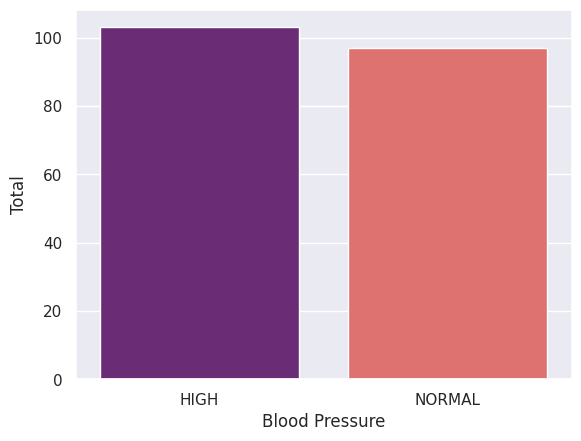

In [18]:
sns.set_theme(style="darkgrid")
sns.countplot(x="Cholesterol", data=df_drug, palette="magma")
plt.xlabel('Blood Pressure')
plt.ylabel('Total')
plt.show()

## 5.5 Gender Distribution based on Drug Type 👫💊

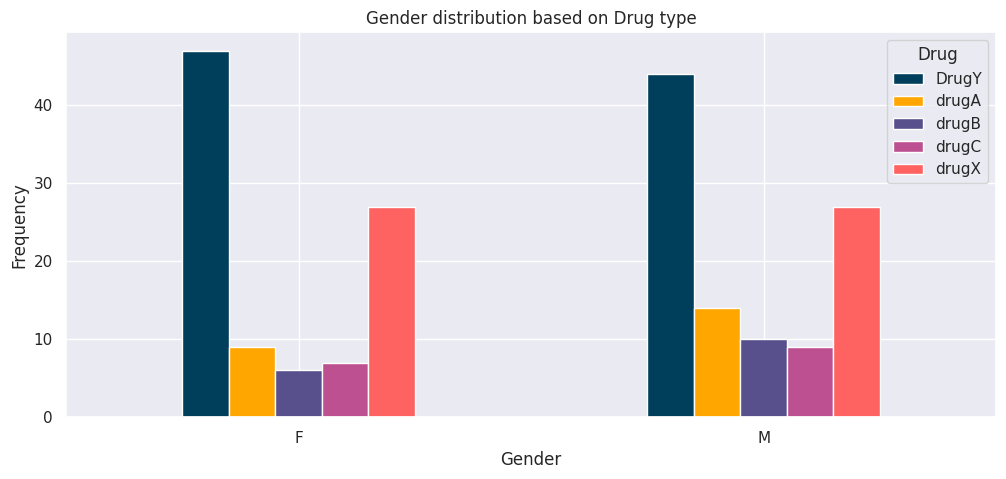

In [19]:
pd.crosstab(df_drug.Sex,df_drug.Drug).plot(kind="bar",figsize=(12,5),color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361'])
plt.title('Gender distribution based on Drug type')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

## 5.6 Blood Pressure Distribution based on Cholesetrol 🩸🥛

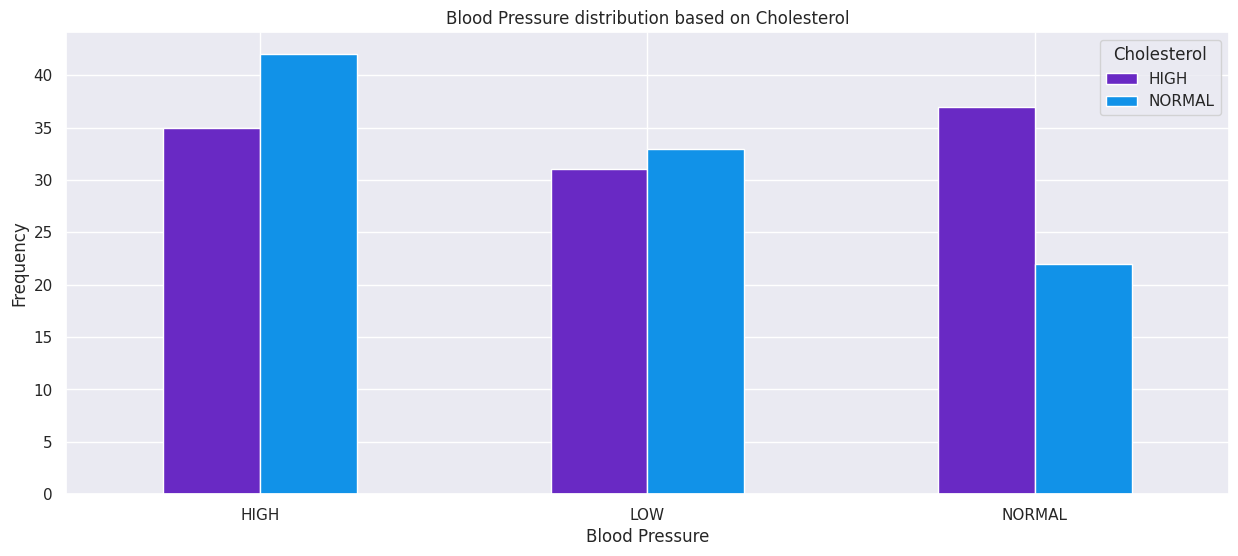

In [20]:
pd.crosstab(df_drug.BP,df_drug.Cholesterol).plot(kind="bar",figsize=(15,6),color=['#6929c4','#1192e8'])
plt.title('Blood Pressure distribution based on Cholesterol')
plt.xlabel('Blood Pressure')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

## 5.7 Sodium to Potassium Distribution based on Gender and Age 🧪👫👴

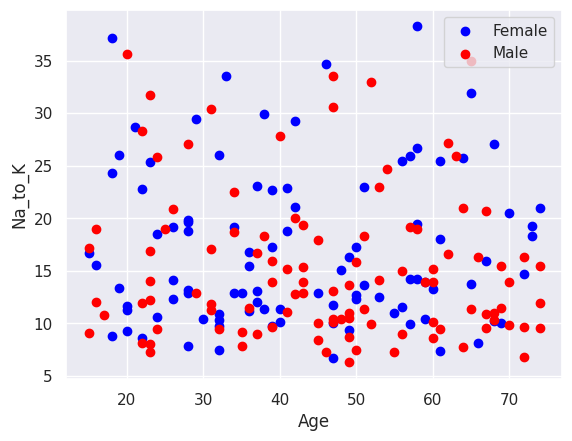

In [21]:
plt.scatter(x=df_drug.Age[df_drug.Sex=='F'], y=df_drug.Na_to_K[(df_drug.Sex=='F')], c="Blue")
plt.scatter(x=df_drug.Age[df_drug.Sex=='M'], y=df_drug.Na_to_K[(df_drug.Sex=='M')], c="Red")
plt.legend(["Female", "Male"])
plt.xlabel("Age")
plt.ylabel("Na_to_K")
plt.show()

# 6. Dataset Preparation ⚙
👉 This section will prepare the dataset before building the machine learning models.

## 6.1 Data Binning 🚮

### 6.1.1 Age 👴
👉 The age will be divided into **7 age categories**:
*  Below 20 y.o.
*  20 - 29 y.o.
*  30 - 39 y.o.
*  40 - 49 y.o.
*  50 - 59 y.o.
*  60 - 69 y.o.
*  Above 70.

In [22]:
bin_age = [0, 19, 29, 39, 49, 59, 69, 80]
category_age = ['<20s', '20s', '30s', '40s', '50s', '60s', '>60s']
df_drug['Age_binned'] = pd.cut(df_drug['Age'], bins=bin_age, labels=category_age)
df_drug = df_drug.drop(['Age'], axis = 1)

### 6.1.2 Na_to_K 🧪
👉 The chemical ratio will be divided into **4 categories**:
*  Below 10.
*  10 - 20.
*  20 - 30.
*  Above 30.

In [23]:
bin_NatoK = [0, 9, 19, 29, 50]
category_NatoK = ['<10', '10-20', '20-30', '>30']
df_drug['Na_to_K_binned'] = pd.cut(df_drug['Na_to_K'], bins=bin_NatoK, labels=category_NatoK)
df_drug = df_drug.drop(['Na_to_K'], axis = 1)

## 6.2 Splitting the dataset 🪓
👉 The dataset will be split into **70% training and 30% testing**.

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [30]:
X = df_drug.drop(["Drug"], axis=1)
y = df_drug["Drug"]

from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
from sklearn.model_selection import train_test_split

# Split the data into training and temporary sets (70% training, 30% temporary)
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Further split the temporary set into training and validation sets (50% training, 50% validation)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_temp, y_train_temp, test_size=.3, random_state=0)

# Optional: Print the sizes of the resulting sets
print("Training set size:", len(X_train))
print("Validation set size:", len(X_valid))
print("Testing set size:", len(X_test))


Training set size: 98
Validation set size: 42
Testing set size: 60


## 6.3 Feature Engineering 🔧
👉 The FE method that used is **one-hot encoding**, which is **transforming categorical variables into a form that could be provided to ML algorithms to do a better prediction**.

In [31]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
X_valid = pd.get_dummies(X_valid)

In [32]:
X_train.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>60s,Na_to_K_binned_<10,Na_to_K_binned_10-20,Na_to_K_binned_20-30,Na_to_K_binned_>30
104,False,True,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False
81,False,True,False,False,True,True,False,False,False,False,False,False,True,False,True,False,False,False
115,False,True,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False
121,False,True,True,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False
53,True,False,True,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False


In [33]:
X_test.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>60s,Na_to_K_binned_<10,Na_to_K_binned_10-20,Na_to_K_binned_20-30,Na_to_K_binned_>30
18,False,True,False,True,False,True,False,False,True,False,False,False,False,False,True,False,False,False
170,True,False,False,False,True,True,False,False,True,False,False,False,False,False,False,True,False,False
107,False,True,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False
98,False,True,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True
177,False,True,False,False,True,True,False,False,True,False,False,False,False,False,False,False,True,False


In [34]:
X_valid.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>60s,Na_to_K_binned_<10,Na_to_K_binned_10-20,Na_to_K_binned_20-30,Na_to_K_binned_>30
110,False,True,True,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False
20,False,True,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False
163,True,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False
69,True,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False
17,False,True,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False


## 6.4 SMOTE Technique ⚒

👉 Since the number of 'DrugY' is more than other types of drugs, **oversampling is carried out to avoid overfitting**.

In [42]:
from imblearn.over_sampling import SMOTE

# Assuming X_train and y_train are your training data
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

<ipython-input-41-e5421e51f6ca>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=y_train, data=df_drug, palette="mako_r")


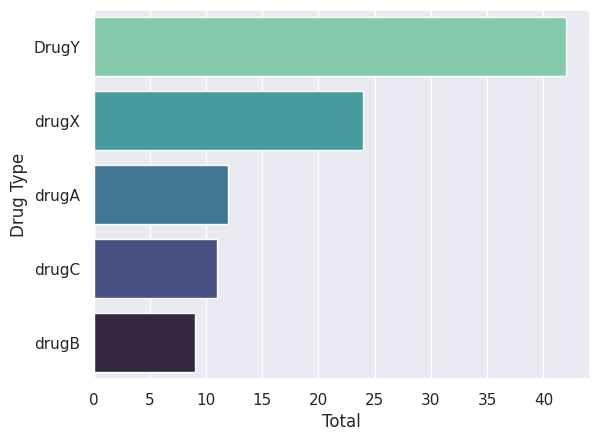

In [41]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, data=df_drug, palette="mako_r")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

👉 As can be seen, the distrubtion of drug type are now balanced.

# 7. Models 🛠

## 7.1 Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

       DrugY       0.92      0.73      0.81        30
       drugA       0.67      0.80      0.73         5
       drugB       1.00      0.67      0.80         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18

    accuracy                           0.83        60
   macro avg       0.81      0.84      0.81        60
weighted avg       0.85      0.83      0.83        60

[[22  2  0  2  4]
 [ 1  4  0  0  0]
 [ 1  0  2  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]
Logistic Regression accuracy is: 83.33%


In [90]:
from sklearn.linear_model import LogisticRegression

# Train the logistic regression model on the training set (X_train, y_train)
LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000)
LRclassifier.fit(X_train, y_train)

# Predict on the test set (X_test)
y_pred_test = LRclassifier.predict(X_test)

# Evaluate performance on the test set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Performance on Test Set:")
print(classification_report(y_test, y_pred_test))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))
LRAcc_test = accuracy_score(y_pred_test, y_test)
print('Logistic Regression accuracy on Test Set is: {:.2f}%'.format(LRAcc_test * 100))

# Predict on the validation set (X_valid)
y_pred_valid = LRclassifier.predict(X_valid)

# Evaluate performance on the validation set
print("\nPerformance on Validation Set:")
print(classification_report(y_valid, y_pred_valid))
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred_valid))
LRAcc_valid = accuracy_score(y_pred_valid, y_valid)
print('Logistic Regression accuracy on Validation Set is: {:.2f}%'.format(LRAcc_valid * 100))


Performance on Test Set:
              precision    recall  f1-score   support

       DrugY       0.92      0.73      0.81        30
       drugA       0.67      0.80      0.73         5
       drugB       1.00      0.67      0.80         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18

    accuracy                           0.83        60
   macro avg       0.81      0.84      0.81        60
weighted avg       0.85      0.83      0.83        60

Confusion Matrix:
[[22  2  0  2  4]
 [ 1  4  0  0  0]
 [ 1  0  2  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]
Logistic Regression accuracy on Test Set is: 83.33%

Performance on Validation Set:
              precision    recall  f1-score   support

       DrugY       0.76      0.68      0.72        19
       drugA       0.83      0.83      0.83         6
       drugB       1.00      0.25      0.40         4
       drugC       0.25      1.00      0.40         1
       drugX       0.8

Text(53.75, 0.5, 'Truth')

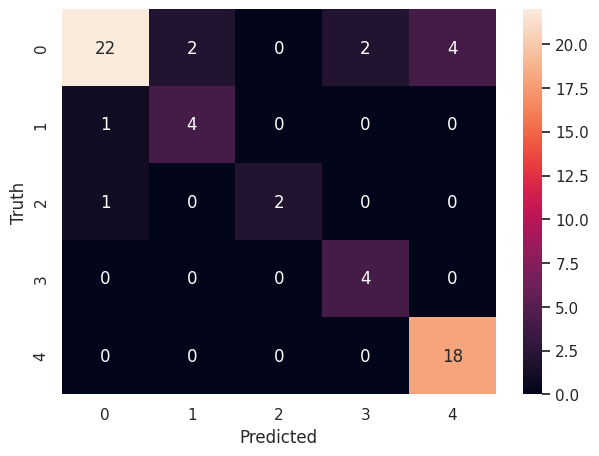

In [91]:
cm = confusion_matrix(y_test,y_pred_test)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## 7.2 K Neighbours

In [45]:
from sklearn.neighbors import KNeighborsClassifier
KNclassifier = KNeighborsClassifier(n_neighbors=20)
KNclassifier.fit(X_train, y_train)

y_pred = KNclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
KNAcc = accuracy_score(y_pred,y_test)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100))

              precision    recall  f1-score   support

       DrugY       0.65      0.80      0.72        30
       drugA       1.00      0.20      0.33         5
       drugB       1.00      0.33      0.50         3
       drugC       0.50      0.25      0.33         4
       drugX       0.74      0.78      0.76        18

    accuracy                           0.68        60
   macro avg       0.78      0.47      0.53        60
weighted avg       0.71      0.68      0.66        60

[[24  0  0  1  5]
 [ 4  1  0  0  0]
 [ 2  0  1  0  0]
 [ 3  0  0  1  0]
 [ 4  0  0  0 14]]
K Neighbours accuracy is: 68.33%


In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train the KNN classifier on the training set (X_train, y_train)
KNclassifier = KNeighborsClassifier(n_neighbors=20)
KNclassifier.fit(X_train, y_train)

# Predict on the test set (X_test)
y_pred_test = KNclassifier.predict(X_test)

# Evaluate performance on the test set
print("Performance on Test Set:")
print(classification_report(y_test, y_pred_test))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))
KNAcc_test = accuracy_score(y_pred_test, y_test)
print('K Nearest Neighbors accuracy on Test Set is: {:.2f}%'.format(KNAcc_test * 100))

# Predict on the validation set (X_valid)
y_pred_valid = KNclassifier.predict(X_valid)

# Evaluate performance on the validation set
print("\nPerformance on Validation Set:")
print(classification_report(y_valid, y_pred_valid))
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred_valid))
KNAcc_valid = accuracy_score(y_pred_valid, y_valid)
print('K Nearest Neighbors accuracy on Validation Set is: {:.2f}%'.format(KNAcc_valid * 100))


Performance on Test Set:
              precision    recall  f1-score   support

       DrugY       0.65      0.80      0.72        30
       drugA       1.00      0.20      0.33         5
       drugB       1.00      0.33      0.50         3
       drugC       0.50      0.25      0.33         4
       drugX       0.74      0.78      0.76        18

    accuracy                           0.68        60
   macro avg       0.78      0.47      0.53        60
weighted avg       0.71      0.68      0.66        60

Confusion Matrix:
[[24  0  0  1  5]
 [ 4  1  0  0  0]
 [ 2  0  1  0  0]
 [ 3  0  0  1  0]
 [ 4  0  0  0 14]]
K Nearest Neighbors accuracy on Test Set is: 68.33%

Performance on Validation Set:
              precision    recall  f1-score   support

       DrugY       0.54      0.79      0.64        19
       drugA       0.00      0.00      0.00         6
       drugB       0.00      0.00      0.00         4
       drugC       0.00      0.00      0.00         1
       drugX       0.6

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(53.75, 0.5, 'Truth')

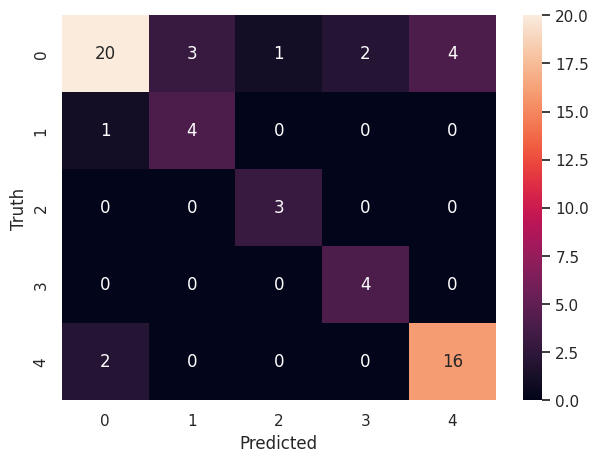

In [89]:
cm = confusion_matrix(y_test,y_pred_test)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

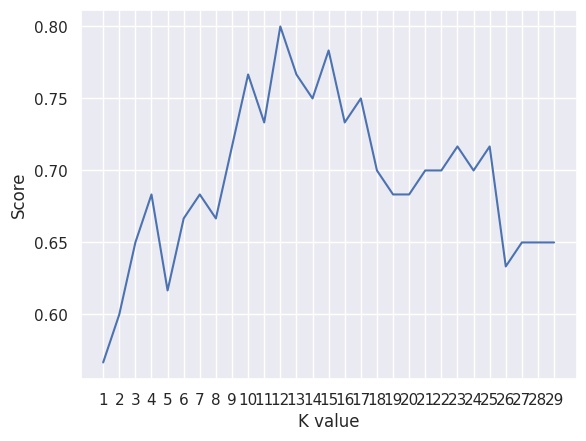

KNN Acc Max 80.00%


In [48]:
scoreListknn = []
for i in range(1,30):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))

plt.plot(range(1,30), scoreListknn)
plt.xticks(np.arange(1,30,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAccMax = max(scoreListknn)
print("KNN Acc Max {:.2f}%".format(KNAccMax*100))

## 7.3 Support Vector Machine (SVM)

In [80]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train the SVC classifier on the training set (X_train, y_train)
SVCclassifier = SVC(kernel='linear', max_iter=251)
SVCclassifier.fit(X_train, y_train)

# Predict on the test set (X_test)
y_pred_test = SVCclassifier.predict(X_test)

# Evaluate performance on the test set
print("Performance on Test Set:")
print(classification_report(y_test, y_pred_test))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))
SVCAcc_test = accuracy_score(y_pred_test, y_test)
print('SVC accuracy on Test Set is: {:.2f}%'.format(SVCAcc_test * 100))

# Predict on the validation set (X_valid)
y_pred_valid = SVCclassifier.predict(X_valid)

# Evaluate performance on the validation set
print("\nPerformance on Validation Set:")
print(classification_report(y_valid, y_pred_valid))
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred_valid))
SVCAcc_valid = accuracy_score(y_pred_valid, y_valid)
print('SVC accuracy on Validation Set is: {:.2f}%'.format(SVCAcc_valid * 100))


Performance on Test Set:
              precision    recall  f1-score   support

       DrugY       0.88      0.73      0.80        30
       drugA       0.67      0.40      0.50         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18

    accuracy                           0.82        60
   macro avg       0.76      0.83      0.77        60
weighted avg       0.82      0.82      0.81        60

Confusion Matrix:
[[22  1  1  2  4]
 [ 3  2  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]
SVC accuracy on Test Set is: 81.67%

Performance on Validation Set:
              precision    recall  f1-score   support

       DrugY       0.67      0.63      0.65        19
       drugA       0.33      0.17      0.22         6
       drugB       1.00      0.75      0.86         4
       drugC       0.25      1.00      0.40         1
       drugX       0.86      1.00     

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=251).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Text(53.75, 0.5, 'Truth')

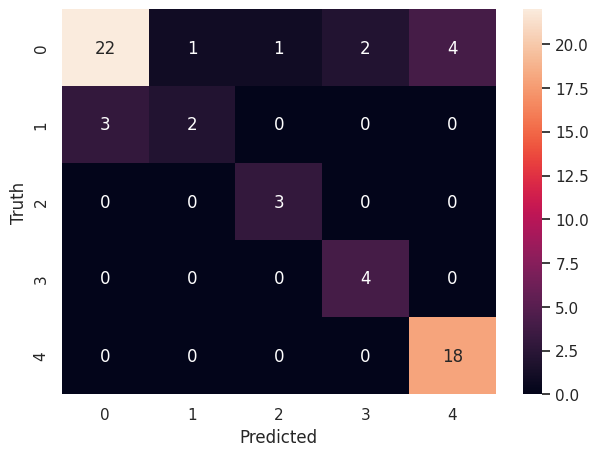

In [82]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## 7.4 Naive Bayes
### 7.4.1 Categorical NB

In [ ]:
from sklearn.naive_bayes import CategoricalNB
NBclassifier1 = CategoricalNB()
NBclassifier1.fit(X_train, y_train)

y_pred = NBclassifier1.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc1 = accuracy_score(y_pred,y_test)
print('Naive Bayes accuracy is: {:.2f}%'.format(NBAcc1*100))

In [84]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train the Categorical Naive Bayes classifier on the training set (X_train, y_train)
NBclassifier1 = CategoricalNB()
NBclassifier1.fit(X_train, y_train)

# Predict on the test set (X_test)
y_pred_test = NBclassifier1.predict(X_test)

# Evaluate performance on the test set
print("Performance on Test Set:")
print(classification_report(y_test, y_pred_test))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))
NBAcc1_test = accuracy_score(y_pred_test, y_test)
print('Naive Bayes accuracy on Test Set is: {:.2f}%'.format(NBAcc1_test * 100))

# Predict on the validation set (X_valid)
y_pred_valid = NBclassifier1.predict(X_valid)

# Evaluate performance on the validation set
print("\nPerformance on Validation Set:")
print(classification_report(y_valid, y_pred_valid))
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred_valid))
NBAcc1_valid = accuracy_score(y_pred_valid, y_valid)
print('Naive Bayes accuracy on Validation Set is: {:.2f}%'.format(NBAcc1_valid * 100))


Performance on Test Set:
              precision    recall  f1-score   support

       DrugY       0.87      0.67      0.75        30
       drugA       0.57      0.80      0.67         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.80      0.89      0.84        18

    accuracy                           0.78        60
   macro avg       0.73      0.87      0.78        60
weighted avg       0.80      0.78      0.78        60

Confusion Matrix:
[[20  3  1  2  4]
 [ 1  4  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 2  0  0  0 16]]
Naive Bayes accuracy on Test Set is: 78.33%

Performance on Validation Set:
              precision    recall  f1-score   support

       DrugY       0.85      0.58      0.69        19
       drugA       0.62      0.83      0.71         6
       drugB       1.00      0.75      0.86         4
       drugC       0.25      1.00      0.40         1
       drugX       0.86      1

Text(53.75, 0.5, 'Truth')

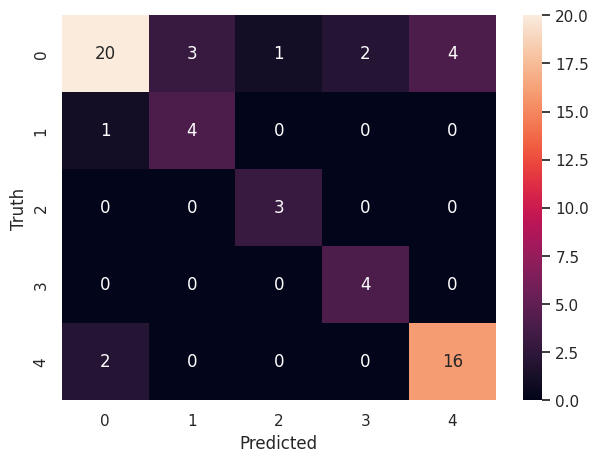

In [85]:
cm = confusion_matrix(y_test,y_pred_test)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### 7.4.2 Gaussian NB

In [76]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train the Gaussian Naive Bayes classifier on the training set (X_train, y_train)
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

# Predict on the test set (X_test)
y_pred_test = NBclassifier2.predict(X_test)

# Evaluate performance on the test set
print("Performance on Test Set:")
print(classification_report(y_test, y_pred_test))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))
NBAcc2_test = accuracy_score(y_pred_test, y_test)
print('Gaussian Naive Bayes accuracy on Test Set is: {:.2f}%'.format(NBAcc2_test * 100))

# Predict on the validation set (X_valid)
y_pred_valid = NBclassifier2.predict(X_valid)

# Evaluate performance on the validation set
print("\nPerformance on Validation Set:")
print(classification_report(y_valid, y_pred_valid))
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred_valid))
NBAcc2_valid = accuracy_score(y_pred_valid, y_valid)
print('Gaussian Naive Bayes accuracy on Validation Set is: {:.2f}%'.format(NBAcc2_valid * 100))


Performance on Test Set:
              precision    recall  f1-score   support

       DrugY       1.00      0.70      0.82        30
       drugA       0.71      1.00      0.83         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18

    accuracy                           0.85        60
   macro avg       0.79      0.94      0.84        60
weighted avg       0.89      0.85      0.85        60

Confusion Matrix:
[[21  2  1  2  4]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]
Gaussian Naive Bayes accuracy on Test Set is: 85.00%

Performance on Validation Set:
              precision    recall  f1-score   support

       DrugY       1.00      0.58      0.73        19
       drugA       0.60      1.00      0.75         6
       drugB       1.00      0.75      0.86         4
       drugC       0.25      1.00      0.40         1
       drugX       0.

Text(53.75, 0.5, 'Truth')

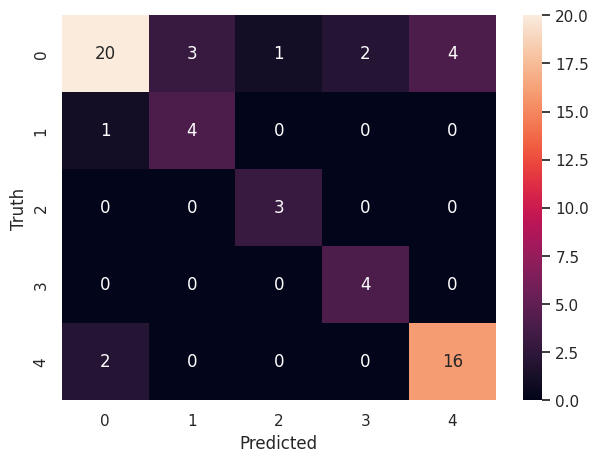

In [86]:
cm = confusion_matrix(y_test,y_pred_test)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## 7.5 Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train the Decision Tree classifier on the training set (X_train, y_train)
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=20)
DTclassifier.fit(X_train, y_train)

# Predict on the test set (X_test)
y_pred_test = DTclassifier.predict(X_test)

# Evaluate performance on the test set
print("Performance on Test Set:")
print(classification_report(y_test, y_pred_test))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))
DTAcc_test = accuracy_score(y_pred_test, y_test)
print('Decision Tree accuracy on Test Set is: {:.2f}%'.format(DTAcc_test * 100))

# Predict on the validation set (X_valid)
y_pred_valid = DTclassifier.predict(X_valid)

# Evaluate performance on the validation set
print("\nPerformance on Validation Set:")
print(classification_report(y_valid, y_pred_valid))
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred_valid))
DTAcc_valid = accuracy_score(y_pred_valid, y_valid)
print('Decision Tree accuracy on Validation Set is: {:.2f}%'.format(DTAcc_valid * 100))


Performance on Test Set:
              precision    recall  f1-score   support

       DrugY       0.86      0.63      0.73        30
       drugA       0.50      0.80      0.62         5
       drugB       0.60      1.00      0.75         3
       drugC       0.67      1.00      0.80         4
       drugX       0.84      0.89      0.86        18

    accuracy                           0.77        60
   macro avg       0.69      0.86      0.75        60
weighted avg       0.80      0.77      0.77        60

Confusion Matrix:
[[19  4  2  2  3]
 [ 1  4  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 2  0  0  0 16]]
Decision Tree accuracy on Test Set is: 76.67%

Performance on Validation Set:
              precision    recall  f1-score   support

       DrugY       0.86      0.63      0.73        19
       drugA       0.80      0.67      0.73         6
       drugB       0.67      1.00      0.80         4
       drugC       0.25      1.00      0.40         1
       drugX       0.85     

Text(53.75, 0.5, 'Truth')

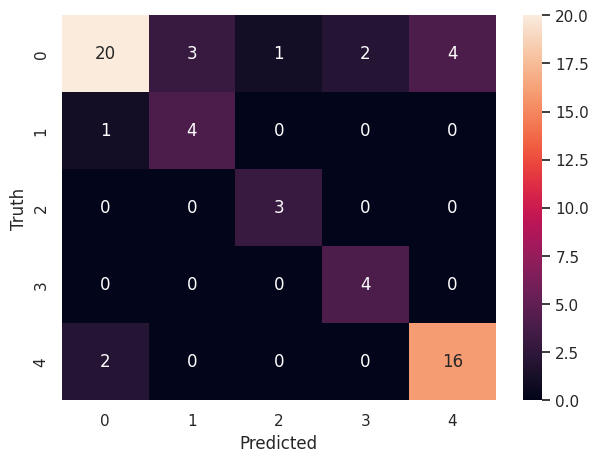

In [87]:
cm = confusion_matrix(y_test,y_pred_test)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


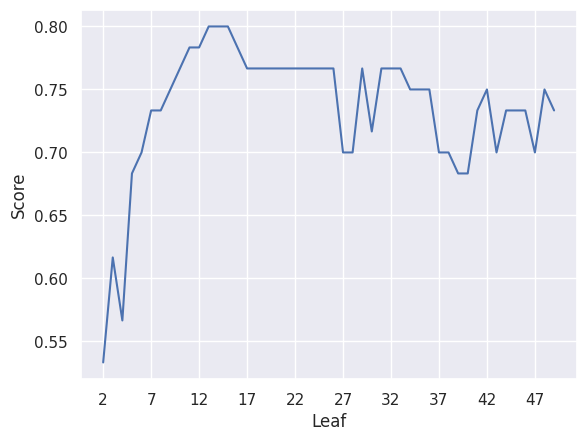

DT Acc Max 80.00%


In [57]:
scoreListDT = []
for i in range(2,50):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))

plt.plot(range(2,50), scoreListDT)
plt.xticks(np.arange(2,50,5))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAccMax = max(scoreListDT)
print("DT Acc Max {:.2f}%".format(DTAccMax*100))

## 7.6 Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train the Random Forest classifier on the training set (X_train, y_train)
RFclassifier = RandomForestClassifier(max_leaf_nodes=30)
RFclassifier.fit(X_train, y_train)

# Predict on the test set (X_test)
y_pred_test = RFclassifier.predict(X_test)

# Evaluate performance on the test set
print("Performance on Test Set:")
print(classification_report(y_test, y_pred_test))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))
RFAcc_test = accuracy_score(y_pred_test, y_test)
print('Random Forest accuracy on Test Set is: {:.2f}%'.format(RFAcc_test * 100))

# Predict on the validation set (X_valid)
y_pred_valid = RFclassifier.predict(X_valid)

# Evaluate performance on the validation set
print("\nPerformance on Validation Set:")
print(classification_report(y_valid, y_pred_valid))
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred_valid))
RFAcc_valid = accuracy_score(y_pred_valid, y_valid)
print('Random Forest accuracy on Validation Set is: {:.2f}%'.format(RFAcc_valid * 100))


Performance on Test Set:
              precision    recall  f1-score   support

       DrugY       0.85      0.77      0.81        30
       drugA       0.67      0.80      0.73         5
       drugB       1.00      0.67      0.80         3
       drugC       0.67      1.00      0.80         4
       drugX       0.84      0.89      0.86        18

    accuracy                           0.82        60
   macro avg       0.81      0.82      0.80        60
weighted avg       0.83      0.82      0.82        60

Confusion Matrix:
[[23  2  0  2  3]
 [ 1  4  0  0  0]
 [ 1  0  2  0  0]
 [ 0  0  0  4  0]
 [ 2  0  0  0 16]]
Random Forest accuracy on Test Set is: 81.67%

Performance on Validation Set:
              precision    recall  f1-score   support

       DrugY       0.68      0.68      0.68        19
       drugA       0.67      0.67      0.67         6
       drugB       1.00      0.25      0.40         4
       drugC       0.25      1.00      0.40         1
       drugX       0.83     

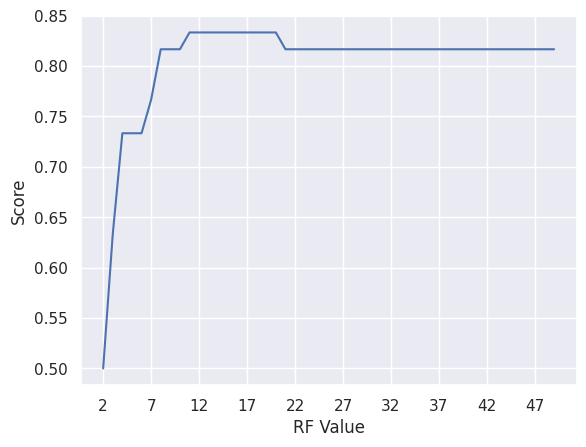

RF Acc Max 83.33%


In [61]:
scoreListRF = []
for i in range(2,50):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))

plt.plot(range(2,50), scoreListRF)
plt.xticks(np.arange(2,50,5))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAccMax = max(scoreListRF)
print("RF Acc Max {:.2f}%".format(RFAccMax*100))

Text(53.75, 0.5, 'Truth')

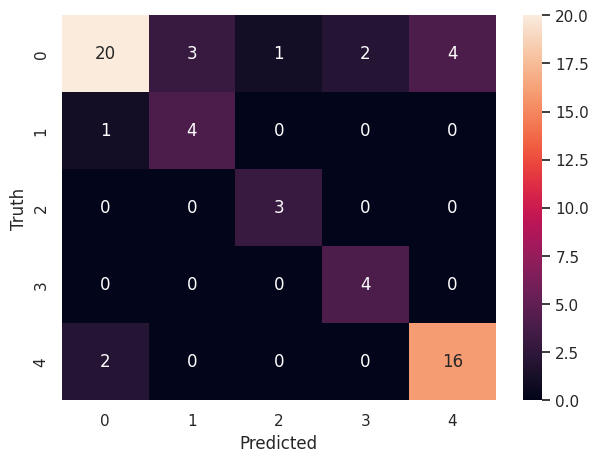

In [88]:
cm = confusion_matrix(y_test,y_pred_test)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

👉 From the results, it can be seen that most of ML models can reach **up to 80% accuracy** in predicting classification of drug type.

# 8. References 🔗
📚 **Kaggle Notebook**:
*  [Drug Classification With Different Algorithms by Görkem Günay](https://www.kaggle.com/gorkemgunay/drug-classification-with-different-algorithms)
*  [Drug Classification - 100% Accuracy by Erin Ward](https://www.kaggle.com/eward96/drug-classification-100-accuracy)
*  [drug prediction with acc(100 %) by Sachin Sharma](https://www.kaggle.com/sachinsharma1123/drug-prediction-with-acc-100)

---

**Like this notebook? You can support me by giving upvote** 😆👍🔼 <br>
👉 *More about myself: [linktr.ee/caesarmario_](http://linktr.ee/caesarmario_)*